Feature Selection
Capstone Project - Predicting Car Accident Severity


This notebook contains all the steps and transformations I performed for the feature selection for the Predictin of Traffic Accident Severity project. You can find the information on the raw data in the following kaggle page(https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016). The kaggle data sets contain an extended descriptions of different aspect of the accidents, thus I've selected the most relevant and useful data for my analysis.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Importing Data**

In [11]:
df_char  = pd.read_csv('Car_Accident/caracteristics.csv', encoding='latin-1', low_memory=False)
df_pl    = pd.read_csv('Car_Accident/places.csv')
df_users = pd.read_csv(r'Car_Accident/users.csv')
df_veh   = pd.read_csv(r'Car_Accident/vehicles.csv')
df_holi  = pd.read_csv('Car_Accident/holidays.csv')


 <b> Looking at some Characteristics and Places Information </b> 

In [12]:
df_char.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

**Dropping Unrelevant Information**

In [13]:
# dropping unrelevant columns.

df_char.drop(['adr','com', 'gps'], axis=1, inplace=True)
df_pl.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
df_veh.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(df_char.shape, df_pl.shape, df_veh.shape, df_users.shape)
df_pl

(202432, 13) (112399, 12) (1048574, 2) (71371, 12)


,Num_Acc,catr,voie,circ,nbv,vosp,prof,plan,surf,infra,situ,env1
0,201600000001,3,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,4,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,4,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112394,201500052963,4,0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0
112395,201500052964,4,0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0
112396,201500052965,4,0,1.0,1.0,0.0,1.0,1.0,3.0,0.0,4.0,99.0
112397,201500052966,4,0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


**Merging the Places and Characteristics Data on the Common Field ID**

In [14]:

df_char.columns = ['ID', 'year', 'month', 'day', 'time', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'dep']
df_pl.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df = df_char.merge(df_pl, how='inner',on='ID')
df.head(5)

,ID,year,month,day,time,lum,agg,int,atm,col,...,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16.0,2.0,1.0,1445.0,1.0,2.0,1.0,8.0,3.0,...,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16.0,3.0,16.0,1800.0,1.0,2.0,6.0,1.0,6.0,...,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16.0,7.0,13.0,1900.0,1.0,1.0,1.0,1.0,6.0,...,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16.0,8.0,15.0,1930.0,2.0,2.0,1.0,7.0,3.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16.0,12.0,23.0,1100.0,1.0,2.0,3.0,1.0,3.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


**The Vehicles Category**

In [15]:
categories = df_veh['catv'].value_counts().sort_index()
print(categories.shape)
categories

(31,)


1      44175
2      47931
3       4055
4        575
5        999
7     645780
8          1
10     55524
11         2
12         2
13      3901
14     10875
15      8910
16       440
17      7478
18        83
19         2
20       929
21      1990
30     51670
31     23933
32     26094
33     83708
34     12346
35       292
36      1421
37      8009
38      2144
39       283
40      1382
99      3640
Name: catv, dtype: int64

**USER Data**

The users data set contains an extended description of the people involved in the accident. For the ease of analysis and computation, I am going to select the aspects I think are more relevant for the prediction of accident severity. These are:

num_users: Number of users involved in each accident.
ped: If there are pedestrians involved or not.
critic_age: If there are users of the critical range of ages involved in the accident. Being the critical ages, the ones with more deaths accounted from 2005 to 2016.
dead_age: If there are users with higher death toll, specifically where from every 10 users of this age at least one dies.
sev: severity of the accident

In [33]:

df_users = pd.read_csv(r'Car_Accident/users.csv')
df_users.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [34]:
df_users.drop(['place', 'sexe', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], axis=1, inplace=True)


In [35]:
df_users.columns = ['ID', 'catu', 'grav', 'secu', 'year_birth']
df_users.sort_values(by='ID').head(10)

,ID,catu,grav,secu,year_birth
1678507,200500000001,1,4,11.0,1976.0
1678512,200500000001,2,1,11.0,1991.0
1678511,200500000001,2,1,11.0,1998.0
1678508,200500000001,1,3,11.0,1968.0
1678509,200500000001,2,1,11.0,1964.0
1678510,200500000001,2,1,31.0,2004.0
1678514,200500000002,1,3,21.0,1979.0
1678513,200500000002,1,1,11.0,1955.0
1678516,200500000003,1,3,21.0,1956.0
1678515,200500000003,1,1,21.0,1983.0


In [36]:
#number of users

num_users = df_users.ID.value_counts().sort_index(ascending=True)
num_users


200500000001    6
200500000002    2
200500000003    2
200500000004    4
200500000005    2
               ..
201600059428    2
201600059429    1
201600059430    2
201600059431    2
201600059432    3
Name: ID, Length: 839985, dtype: int64

**Pedestrians Involved in Accidents**

In [37]:

#pedestrians

df_users['ped'] = df_users['catu'].apply(lambda x: 1 if x==3 else 0)
df_users.head(5)

,ID,catu,grav,secu,year_birth,ped
0,201600000001,1,1,11.0,1983.0,0
1,201600000001,1,3,21.0,2001.0,0
2,201600000002,1,3,11.0,1960.0,0
3,201600000002,2,3,11.0,2000.0,0
4,201600000002,2,3,11.0,1962.0,0


In [38]:
df_users2 = df_users.groupby('ID').sum()
ped = df_users2.ped
print('Accidents in which pedestrians have been involved:')
df_users2.ped.value_counts()

Accidents in which pedestrians have been involved:


0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
10         4
9          3
8          2
25         1
21         1
15         1
Name: ped, dtype: int64

In [39]:
# crical age

acc_year = df_users.ID.astype(str).str[:4] # year of the accident
age = acc_year.astype(int) - df_users['year_birth'] # age of the user
df_users['age']= age
df_users

,ID,catu,grav,secu,year_birth,ped,age
0,201600000001,1,1,11.0,1983.0,0,33.0
1,201600000001,1,3,21.0,2001.0,0,15.0
2,201600000002,1,3,11.0,1960.0,0,56.0
3,201600000002,2,3,11.0,2000.0,0,16.0
4,201600000002,2,3,11.0,1962.0,0,54.0
...,...,...,...,...,...,...,...
1876000,200500087953,1,1,13.0,1972.0,0,33.0
1876001,200500087953,1,1,13.0,1965.0,0,40.0
1876002,200500087953,1,4,23.0,1990.0,0,15.0
1876003,200500087954,1,4,13.0,1951.0,0,54.0


In [40]:
df2 = df_users[df_users['grav']==2]
deaths = df2['age'].value_counts()
deaths.sort_values(ascending=False)

total, suma, i = deaths.values.sum(), 0, 0

for num in deaths.values:
    suma += num
    per = (suma/total)*100
    if per<=50:
        i += 1
        percentage = per
print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(percentage,total,i))

A  49.96 percent of a total of 50487 deaths is found on the 25 first ages, being the deaths array sorted by number of deaths.


**Data Visualization for Number of Deaths**

Text(0.5, 1.0, 'Total number of deahts by age from 2005 to 2016')

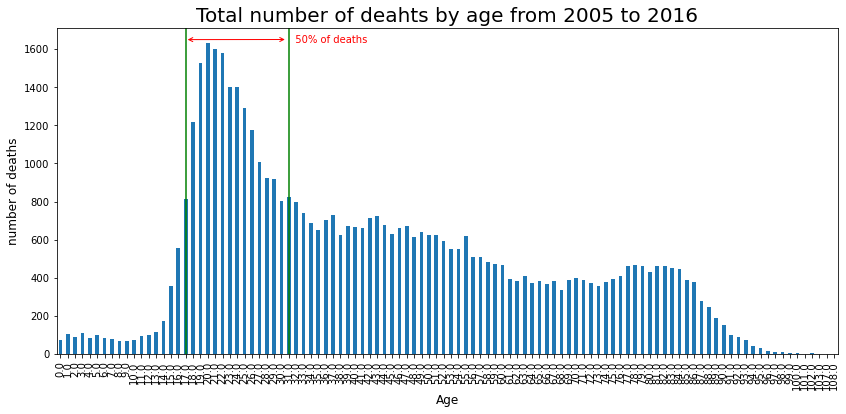

In [41]:

#Visualize the number of deaths by age

pd.DataFrame(deaths)
dplot=deaths.sort_index()
dplot.plot.bar(figsize=(14,6))

plt.annotate('  50% of deaths',
             color='r',
            xy=(17,1650),
            xytext=(31,1635),
            arrowprops=dict(arrowstyle='<->', color='r')
            )

plt.axvline(x=17, color='g', linestyle='-')
plt.axvline(x=31, color='g', linestyle='-')

plt.xlabel('Age', size=12)
plt.ylabel('number of deaths', size=12)
plt.title('Total number of deahts by age from 2005 to 2016', size=20)

People older than 84 are more likely to die with at least 1 out of 10 of the times, rising to beyond 35% in some cases.


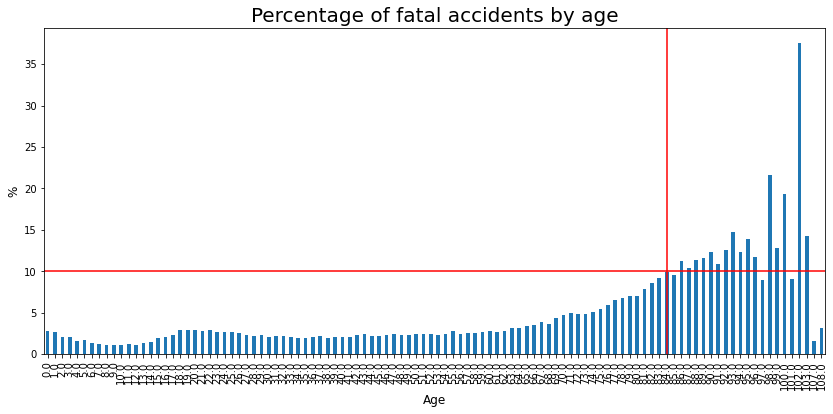

In [42]:
#dead age

death = df2['age'].value_counts().sort_index()
total = df_users['age'].value_counts().sort_index()
death_prop = (deaths/total)*100
d = death_prop.dropna()
minimum = d[d>9.9].index.min()
d.plot.bar(figsize=(14,6))
# plt.xticks(range(108)[0::2])
plt.title('Percentage of fatal accidents by age', size=20)
plt.xlabel('Age', size=12)
plt.ylabel('%', size=12)
plt.axhline(y=10, color='r')
plt.axvline(x=84, color='r')
print('People older than {0:2} are more likely to die\
 with at least 1 out of 10 of the times, rising to beyond 35% in some cases.'.format(int(minimum)))


In order to use the features created with the other features found in the gerenal data frame (df) from the vehicles and characteristics data, they should have same number of rows. Thus, the users data set will be goruped by accident ID.

Last feature is the severity from the gravity feature of the users dataset. Currently it consists of 4 labels:

Unscathed
Dead
Hospitalized Wonded
Light Injury

In [45]:
def change_grav(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = df_users[['ID', 'grav']].copy()
df3['grav'] = df_users['grav'].apply(change_grav)
df3.sort_values(by='ID')

,ID,grav
1678507,200500000001,0
1678512,200500000001,0
1678511,200500000001,0
1678508,200500000001,1
1678509,200500000001,0
...,...,...
133417,201600059431,0
133418,201600059431,0
133421,201600059432,0
133420,201600059432,0


In [46]:
severity = df3[['grav', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,grav
ID,
200500000001,1
200500000002,1
200500000003,1
200500000004,1
200500000005,1
...,...
201600059428,0
201600059429,0
201600059430,0


In [47]:

df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,ID,catu,grav,secu,year_birth,ped,age,sev
0,200500000001,10,11,86.0,11901.0,0,129.0,1
1,200500000002,2,4,32.0,3934.0,0,76.0,1
2,200500000003,2,4,42.0,3939.0,0,71.0,1
3,200500000004,5,14,44.0,7779.0,0,241.0,1
4,200500000005,3,7,22.0,3939.0,0,71.0,1
...,...,...,...,...,...,...,...,...
839980,201600059428,4,5,21.0,3994.0,1,38.0,0
839981,201600059429,1,4,21.0,1984.0,0,32.0,0
839982,201600059430,2,5,32.0,3972.0,0,60.0,0
839983,201600059431,2,8,42.0,3984.0,0,48.0,0


In [51]:

df.rename(columns={'crit_age1':'crit_age','dead_age1':'dead_age', 'ped1':'ped'},inplace=True)
df.to_csv('Data.csv')